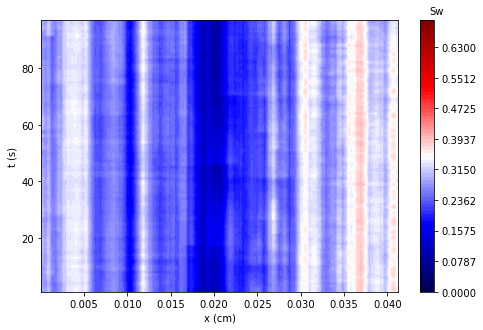

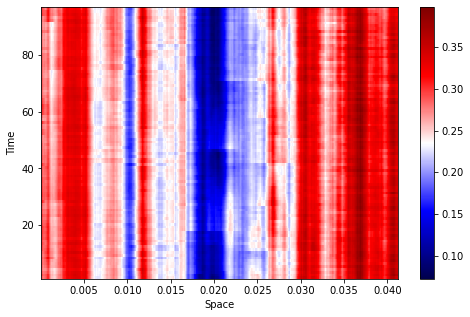

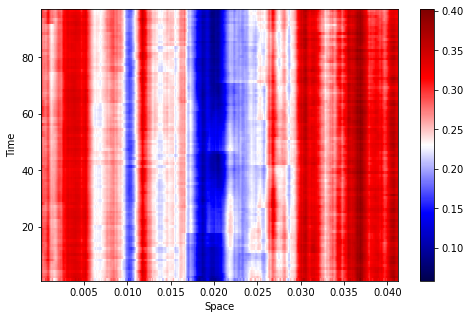

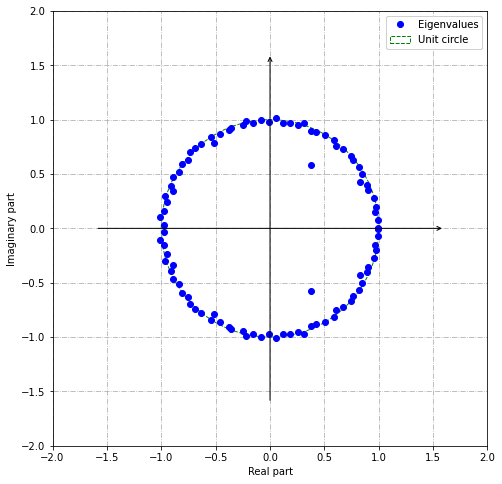

The number of eigenvalues is 96
Eigenvalue (-1.0073734474198934+0.10800755364093961j): distance from unit circle 0.026466894210141145
Eigenvalue (-1.0073734474198934-0.10800755364093961j): distance from unit circle 0.026466894210141145
Eigenvalue (-0.97334359495228+0.03338440088874151j): distance from unit circle 0.05148772794267176
Eigenvalue (-0.97334359495228-0.03338440088874151j): distance from unit circle 0.05148772794267176
Eigenvalue (-0.9773675618352269+0.15725584086385752j): distance from unit circle 0.020023249586465064
Eigenvalue (-0.9773675618352269-0.15725584086385752j): distance from unit circle 0.020023249586465064
Eigenvalue (-0.964541988559735+0.29892316403685393j): distance from unit circle 0.01969630569257208
Eigenvalue (-0.964541988559735-0.29892316403685393j): distance from unit circle 0.01969630569257208
Eigenvalue (-0.9516255397456816+0.23845867563604514j): distance from unit circle 0.03754629211764349
Eigenvalue (-0.9516255397456816-0.23845867563604514j): distan

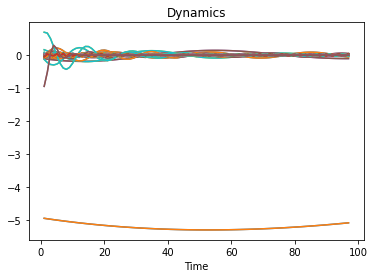

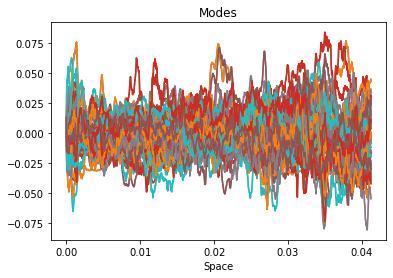

In [5]:
# trying to recreate contour plots and PyDMD that Steffen did 
# contour plot


import numpy as np
from scipy import interpolate
from scipy import fft
from scipy.signal import blackman

from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

import pandas as pd

from scipy.signal import find_peaks, peak_prominences

#################################################
# read saturation profiles from Excel file
#################################################

swproffilename='74_poro.xlsx'
#swproffilename='indiana_og_imb.xlsx'
#filename='test.xlsx'

cols = [i for i in range(1, 100, 1)] #changing sampling time intervals 

swprofiledata = pd.read_excel(swproffilename, usecols=cols, skiprows=[0,1])

#swprofiledata = pd.read_excel(swproffilename,skiprows=[0,1])

# inspecting the Excel sheet --> there are multiple cycles, first cycle is [0:9470]
dfswprofile=pd.DataFrame(swprofiledata)


### contour plot 

xlist=np.array(dfswprofile.cm)
tlistmax=len(dfswprofile.columns)
tlist=np.linspace(dfswprofile.columns[2],dfswprofile.columns[tlistmax-1],tlistmax-2)


#tlist = tlist[::2] 
#print(tlistmax)

X, Y = np.meshgrid(xlist, tlist)
Z = np.sqrt(X**2 + Y**2)


for i in range(0,tlistmax-2):
    for ii in range(0,len(dfswprofile[dfswprofile.columns[i+2]])):
        Z[i,ii]=dfswprofile[dfswprofile.columns[i+2]][ii]

levels=np.linspace(0,0.7,81)

fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(8,5))
#cp = ax.contourf(X, Y, Z,50,cmap='plasma')
cp = ax.contourf(X, Y, Z,levels,cmap='seismic')
#ax.grid(c='k', ls='-', alpha=0.3)
clb=fig.colorbar(cp) # Add a colorbar to a plot
clb.set_label('Sw', labelpad=-40, y=1.05, rotation=0)
#ax.set_title('Filled Contours Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('t (s)')
plt.show()

######################################################################################
#  PyDMD analysis 
######################################################################################

from pydmd import MrDMD
from pydmd import FbDMD
from pydmd import DMD

def make_plot(X, x=None, y=None, figsize=(8, 5), title=''):
    """
    Plot of the data X
    """
    plt.figure(figsize=figsize)
    plt.title(title)
    X = np.real(X)
    CS = plt.pcolor(x, y, X,cmap='seismic')
    cbar = plt.colorbar(CS)
    plt.xlabel('Space')
    plt.ylabel('Time')
    plt.show()
    
data=Z.T    
    
make_plot(data.T, x=xlist, y=tlist)

# First we apply the classical DMD without svd rank truncation

#dmd = DMD(svd_rank=-1)
#dmd = DMD(svd_rank=-1)
dmd = DMD(svd_rank=-1, tlsq_rank=0, exact=True, opt=True)  #(svd_rank=0, exact=True) rank previously 6
dmd.fit(X=data)
make_plot(dmd.reconstructed_data.T, x=xlist, y=tlist)

# plot eigenvalues
dmd.plot_eigs(show_axes=True, show_unit_circle=True, figsize=(8, 8))

# print eigenvalues
print('The number of eigenvalues is {}'.format(dmd.eigs.shape[0]))
for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))


# Plot modes and dynamics (this is somehow mixed up between modes and dynamics)

for dynamic in dmd.dynamics:
    plt.plot(tlist, dynamic.real)
    plt.title('Dynamics')
    plt.xlabel('Time')
plt.show()

for mode in dmd.modes.T:
    plt.plot(xlist, mode.real)
    plt.title('Modes')
    plt.xlabel('Space')
plt.show()



In [6]:
float('-2.469237357960166745e-01')

-0.24692373579601667

In [7]:
import pickle

#script to save the modes for the different sampling intervals 

with open("q07_modes_1s.pkl", "wb") as f:
    pickle.dump(dmd.modes.T, f)
    
#save in pickle format (this maintains the complex numbers for subsequent analysis)

with open("q07_Eigenvalues_1s.pkl", "wb") as f:
    pickle.dump(dmd.eigs, f)

In [8]:
import pickle


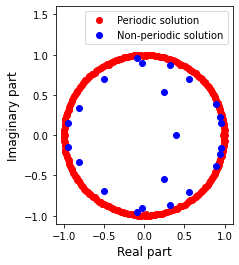

Number of periodic solutions 273
Number of non-periodic solutions 23
Sum of all magnitudes 288.5502793397773


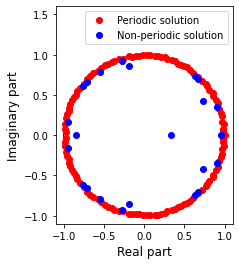

Number of periodic solutions 123
Number of non-periodic solutions 24
Sum of all magnitudes 141.69048307543287


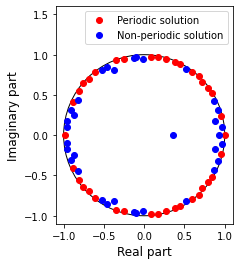

Number of periodic solutions 38
Number of non-periodic solutions 34
Sum of all magnitudes 66.91830378091764


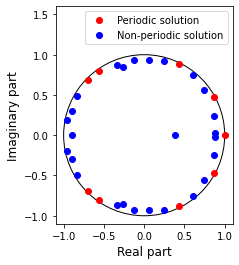

Number of periodic solutions 9
Number of non-periodic solutions 26
Sum of all magnitudes 30.64440056615561


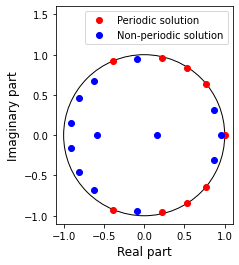

Number of periodic solutions 9
Number of non-periodic solutions 13
Sum of all magnitudes 18.738740184466636


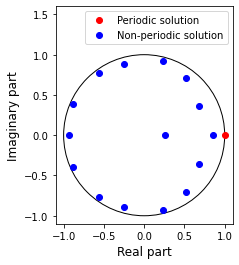

Number of periodic solutions 1
Number of non-periodic solutions 15
Sum of all magnitudes 12.57700094938297


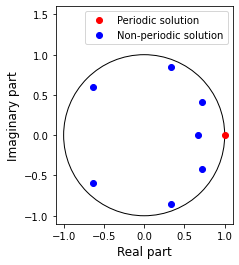

Number of periodic solutions 1
Number of non-periodic solutions 11
Sum of all magnitudes 10.47882748858262


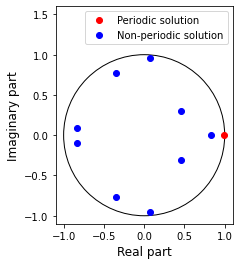

Number of periodic solutions 1
Number of non-periodic solutions 9
Sum of all magnitudes 6.94200850351635


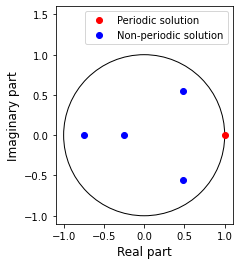

Number of periodic solutions 1
Number of non-periodic solutions 6
Sum of all magnitudes 4.826909149013958


In [9]:
### q =0.1 ml/min 
with open('Eigenvalues_1s.pkl','rb') as f:
    data_1s = pickle.load(f)
    
with open('Eigenvalues_2s.pkl','rb') as f:
    data_2s = pickle.load(f)
    
with open('Eigenvalues_4s.pkl','rb') as f:
    data_4s = pickle.load(f)    
    
with open('Eigenvalues_8s.pkl','rb') as f:
    data_8s = pickle.load(f)
    
with open('Eigenvalues_12s.pkl','rb') as f:
    data_12s = pickle.load(f)
    
with open('Eigenvalues_16s.pkl','rb') as f:
    data_16s = pickle.load(f)  

with open('Eigenvalues_20s.pkl','rb') as f:
    data_20s = pickle.load(f)
    
with open('Eigenvalues_24s.pkl','rb') as f:
    data_24s = pickle.load(f)
    
with open('Eigenvalues_32s.pkl','rb') as f:
    data_32s = pickle.load(f)  

def eigenval_stable(data):
    dist_uc = np.abs(data.imag**2+data.real**2)
    ang_x   = np.arctan(data.imag/ data.real) / (2*np.pi)
    
    figure, axes = plt.subplots()
    cc = plt.Circle(( 0 , 0 ), 1 , fill = False) 
    axes.set_aspect( 1 ) 
    axes.add_artist( cc )
    plt.plot(data.real[(0.95 < dist_uc) & (dist_uc < 1.01)],data.imag[(0.95 < dist_uc) & (dist_uc < 1.01)],'ro')
    plt.plot(data.real[dist_uc <= 0.95],data.imag[dist_uc <= 0.95],'bo')
    plt.ylabel('Imaginary part', fontsize = 12)
    plt.xlabel('Real part', fontsize = 12)
    plt.legend(['Periodic solution', 'Non-periodic solution'])
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.6)

    plt.show()
    periodic = dist_uc[(0.95 < dist_uc) & (dist_uc < 1.01)]
    print("Number of periodic solutions", len(periodic))
    print("Number of non-periodic solutions",  (len(dist_uc) - len(periodic)))
    periodic_list.append(len(periodic))
    non_periodic_list.append((len(dist_uc) - len(periodic)))
    print("Sum of all magnitudes", sum(dist_uc))
    sum_mag.append(sum(dist_uc))
    std_mag.append(np.std(dist_uc))
    angle.append(ang_x)
    mag.append(dist_uc)
    
    

periodic_list     = []
non_periodic_list = []
sum_mag           = []
std_mag           = [] 
angle             = [] 
mag               = []

eigenval_stable(data_1s)  
eigenval_stable(data_2s)    
eigenval_stable(data_4s)    
eigenval_stable(data_8s)    
eigenval_stable(data_12s)    
eigenval_stable(data_16s)    
eigenval_stable(data_20s)    
eigenval_stable(data_24s)    
eigenval_stable(data_32s)    






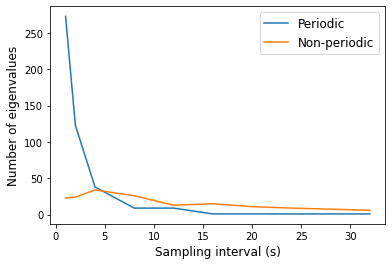

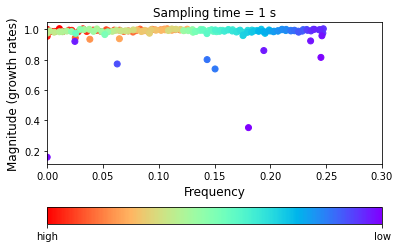

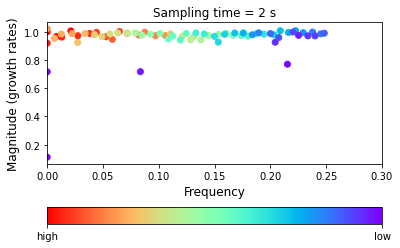

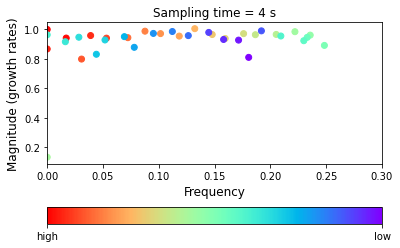

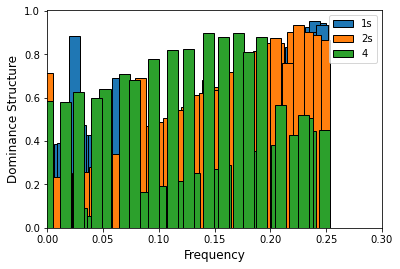

In [10]:
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable


sampling_int = [1, 2, 4, 8, 12, 16, 20, 24, 32]

plt.plot(sampling_int, periodic_list)
plt.plot(sampling_int,non_periodic_list)
plt.ylabel('Number of eigenvalues', fontsize = 12)
plt.xlabel('Sampling interval (s)', fontsize = 12)
plt.legend(['Periodic', 'Non-periodic'], fontsize = 12)

plt.show()


#plot of the angle versus the magnitude of the eigenvectors 
for i in range(3): #iterating over different sampling intervals 
    color_indices = np.linspace(0,1, len(angle[i]))
    plt.scatter(angle[i],mag[i], c=color_indices, cmap=cm.get_cmap('rainbow_r'))
    
    plt.xlim([0, 0.3])
    plt.ylabel('Magnitude (growth rates)', fontsize = 12)
    plt.xlabel('Frequency', fontsize = 12,)
    cbar = plt.colorbar(orientation="horizontal", pad =0.2)
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(['high','low'])
    plt.title('Sampling time = %i s' %sampling_int[i])
    plt.show()

#plot of the dominance structure 
for i in range(3):
    color_indices = np.linspace(0,1, len(angle[i]))
    plt.bar(angle[i],mag[i] * color_indices, width = 0.01, edgecolor = "black")
    
    plt.xlim([0, 0.3])
    plt.ylabel('Dominance Structure', fontsize = 12)
    plt.xlabel('Frequency', fontsize = 12)
plt.legend(['1s','2s','4'])
plt.show()



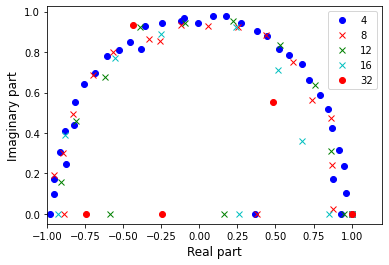

In [11]:
#tracking eigenvalues 
eig_sort1 = np.sort(data_32s) 
eig_sort  = np.sort(data_4s) 
eig_sort2 = np.sort(data_8s) 
eig_sort3 = np.sort(data_12s) 
eig_sort4 = np.sort(data_16s) 

#data is reflected about the x axis (so we can ignore the -ve j values)
#currently values that sit on the axis are doubled up 
plt.plot(eig_sort.real[eig_sort.imag >= 0], eig_sort.imag[eig_sort.imag >= 0], 'bo')
plt.plot(eig_sort2.real[eig_sort2.imag >= 0], eig_sort2.imag[eig_sort2.imag >= 0], 'rx')
plt.plot(eig_sort3.real[eig_sort3.imag >= 0], eig_sort3.imag[eig_sort3.imag >= 0], 'gx')
plt.plot(eig_sort4.real[eig_sort4.imag >= 0], eig_sort4.imag[eig_sort4.imag >= 0], 'cx')
plt.plot(eig_sort1.real[eig_sort1.imag >= 0], eig_sort1.imag[eig_sort1.imag >= 0], 'ro')
plt.ylabel('Imaginary part', fontsize = 12)
plt.xlabel('Real part', fontsize = 12)
plt.legend(['4','8','12','16','32'])
plt.xlim((-1,1.2))
plt.show()

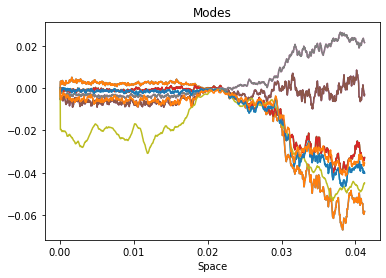

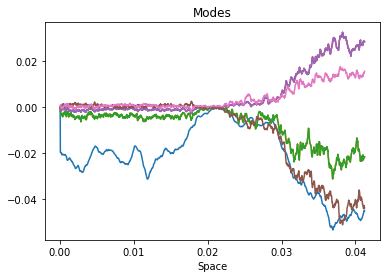

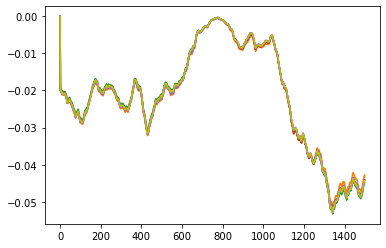

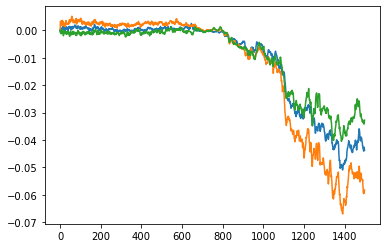

"\nplt.show()   \nplt.plot(mode_16s.real[0])\nplt.plot(mode_12s.real[0])\nplt.plot(-mode_8s.real[0])\nplt.show()   \nplt.plot(mode_4s.real[0])\nplt.plot(mode_2s.real[0])\nplt.plot(-mode_1s.real[0])\nplt.show()   \n\n#plt.legend(['32s','24s','20s','16s','12s','8s','4s','2s','1s'])\n"

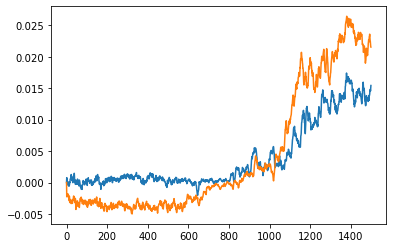

In [12]:

with open('modes_1s.pkl','rb') as f:
    mode_1s = pickle.load(f)
with open('modes_2s.pkl','rb') as f:
    mode_2s = pickle.load(f)
with open('modes_4s.pkl','rb') as f:
    mode_4s = pickle.load(f)
with open('modes_8s.pkl','rb') as f:
    mode_8s = pickle.load(f)
with open('modes_12s.pkl','rb') as f:
    mode_12s = pickle.load(f)
with open('modes_16s.pkl','rb') as f:
    mode_16s = pickle.load(f)
with open('modes_20s.pkl','rb') as f:
    mode_20s = pickle.load(f)
with open('modes_24s.pkl','rb') as f:
    mode_24s = pickle.load(f)
with open('modes_32s.pkl','rb') as f:
    mode_32s = pickle.load(f)
   


for mode in mode_20s:
    plt.plot(xlist, -mode.real)
    plt.title('Modes')
    plt.xlabel('Space')
plt.show()   

for mode in mode_32s:
    plt.plot(xlist, mode.real)
    plt.title('Modes')
    plt.xlabel('Space')
plt.show()    

"""

sort_32s = np.sort(mode_32s.real) 
plt.plot(sort_32s)
plt.show()
"""


plt.plot(mode_32s.real[0])
plt.plot(-mode_24s.real[0])
plt.plot(-mode_20s.real[8])
plt.plot(mode_16s.real[0])
plt.plot(mode_12s.real[0])
plt.plot(mode_8s.real[2])
plt.plot(mode_4s.real[0])
plt.plot(mode_2s.real[2])
plt.plot(-mode_1s.real[2])
plt.show() 

#trying to find the modes in 32s sampling int 

plt.plot(mode_32s.real[5])
plt.plot(-mode_20s.real[1])
plt.plot(-mode_20s.real[2])
plt.show() 

plt.plot(mode_32s.real[6])
plt.plot(-mode_20s.real[6])


"""
plt.show()   
plt.plot(mode_16s.real[0])
plt.plot(mode_12s.real[0])
plt.plot(-mode_8s.real[0])
plt.show()   
plt.plot(mode_4s.real[0])
plt.plot(mode_2s.real[0])
plt.plot(-mode_1s.real[0])
plt.show()   

#plt.legend(['32s','24s','20s','16s','12s','8s','4s','2s','1s'])
"""

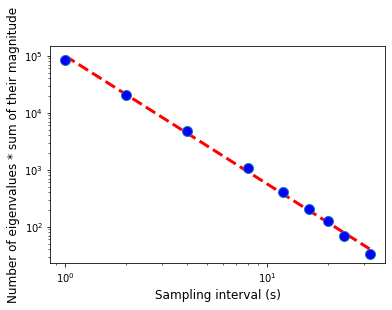

In [13]:
#number of modes for the different sampling intervals 
count_list   = [len(data_1s), len(data_2s), len(data_4s), len(data_8s), len(data_12s), len(data_16s), len(data_20s), len(data_24s), len(data_32s)]
sampling_int = [1, 2, 4, 8, 12, 16, 20, 24, 32]

count_mag = np.array(sum_mag)* np.array(count_list)

logA = np.log(sampling_int)
logB = np.log(count_mag)

#logB = np.log(count_list) 

m, cov      = np.polyfit(logA, logB, 1, cov=True) # fit log(y) = m*log(x) + c
y_fit       = np.exp(m[0]*logA + m[1]) # calculate the fitted values of y 
d_slope_q01 = np.sqrt(cov[1][1]) #slope uncertainty 
m_q01       = m

#plt.plot(sampling_int, count_list, color = 'r')
plt.plot(sampling_int, y_fit, color='red', linestyle='dashed', linewidth = 3)
plt.plot(sampling_int, count_mag, 'o', markerfacecolor='blue', markersize=10)
plt.yscale("log")
plt.xscale("log")
plt.ylabel('Number of eigenvalues * sum of their magnitude', fontsize = 12)
plt.xlabel('Sampling interval (s)', fontsize = 12)

ax.set_yscale('symlog')
ax.set_xscale('symlog')



In [14]:
# looking at how eigenvalues persist with the different sampling ints 

eig_sort1  = np.sort(data_1s) 
eig_sort2  = np.sort(data_2s) 


eig_sort24 = np.sort(data_24s) 
eig_sort32 = np.sort(data_32s) 


# Identical element summation in lists
# using sum() + zip()
res = sum(x == y for x, y in zip(data_32s, data_16s))
# printing result
print("Summation of Identical elements : " + str(res))

Summation of Identical elements : 0


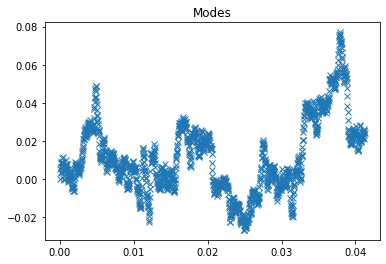

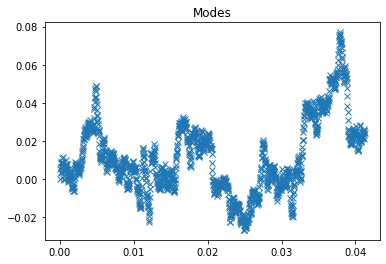

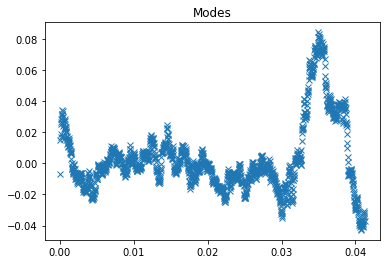

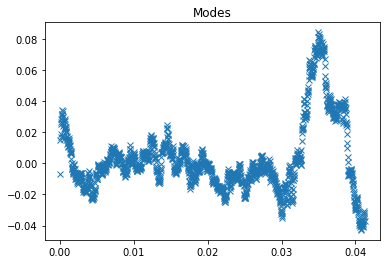

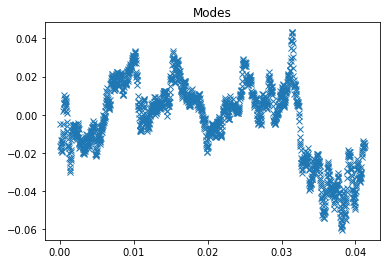

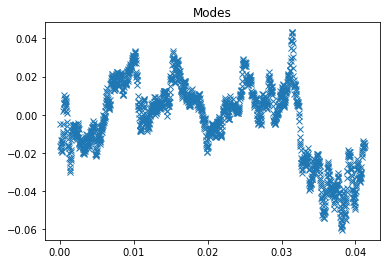

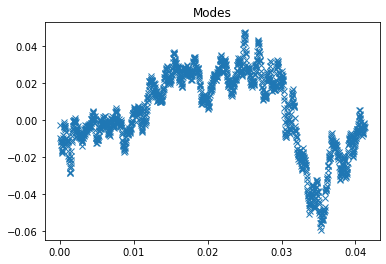

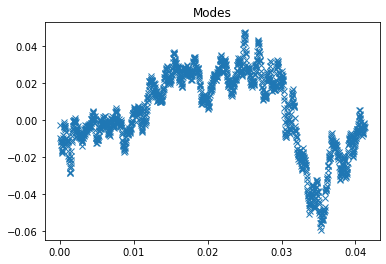

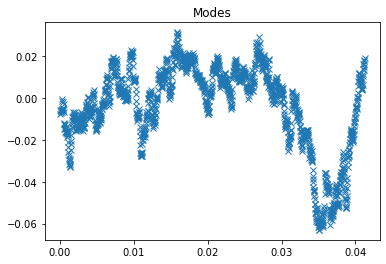

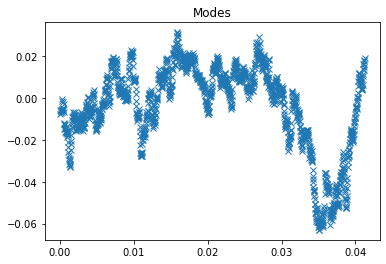

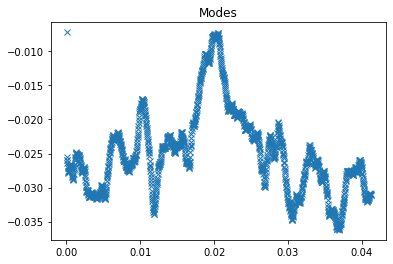

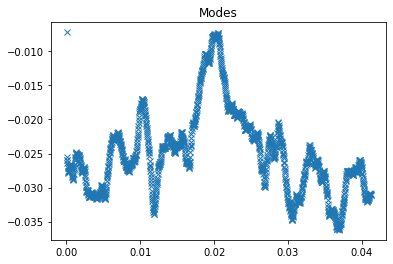

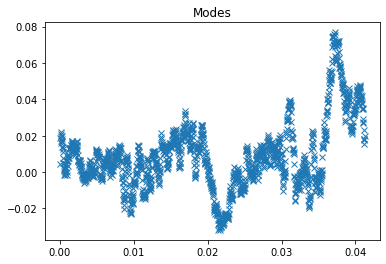

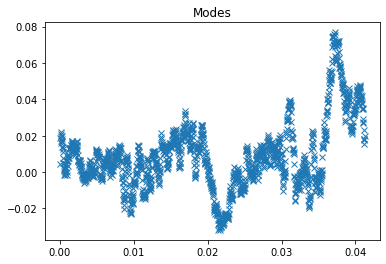

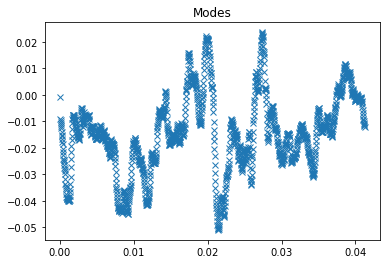

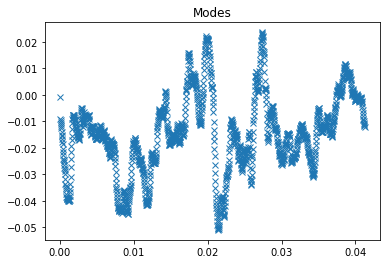

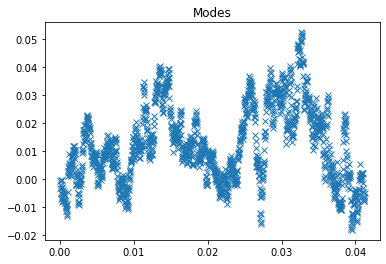

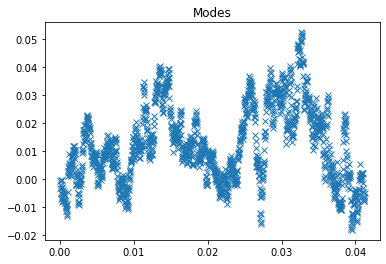

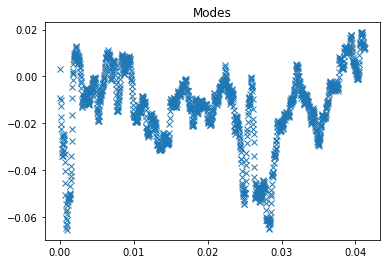

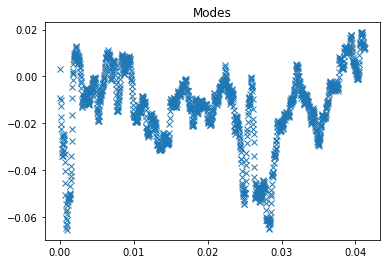

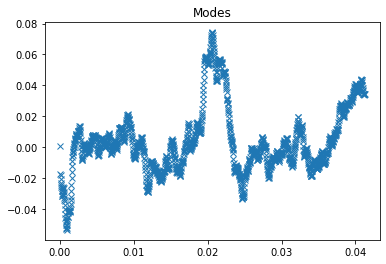

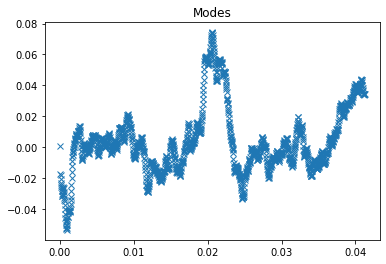

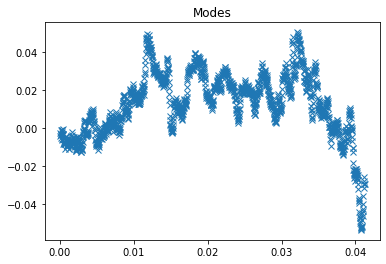

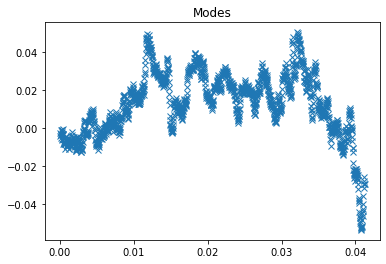

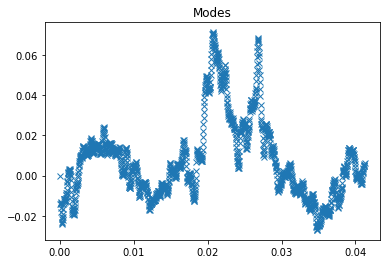

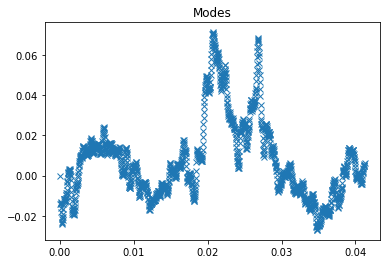

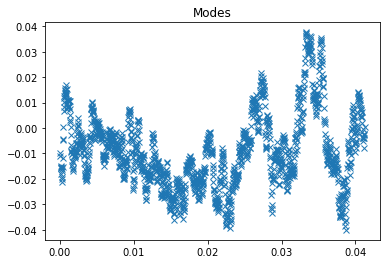

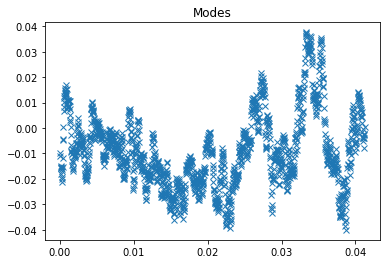

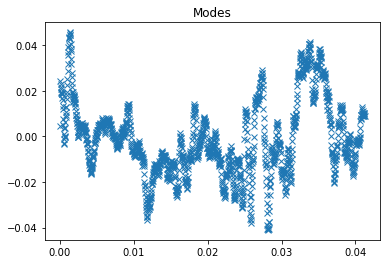

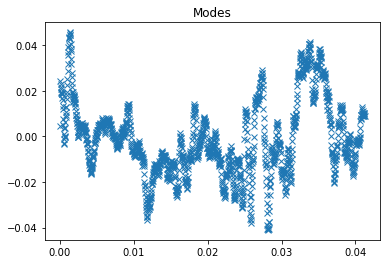

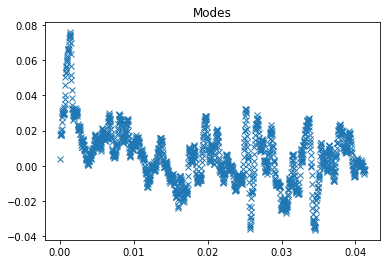

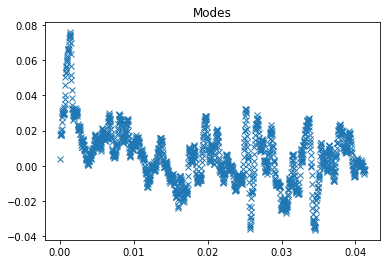

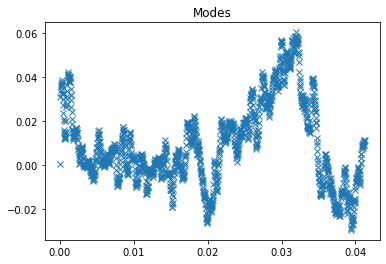

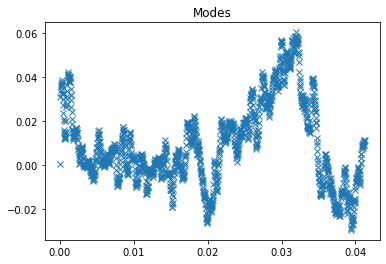

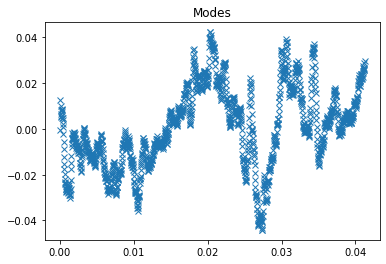

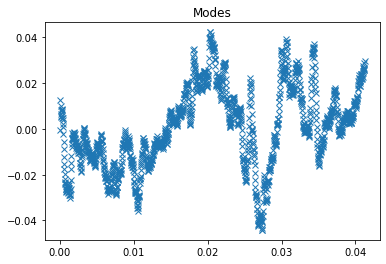

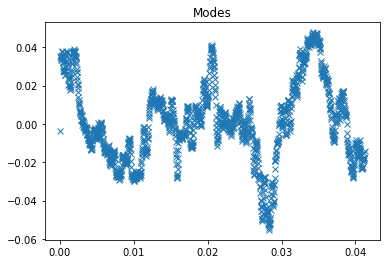

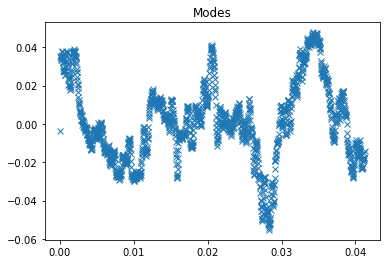

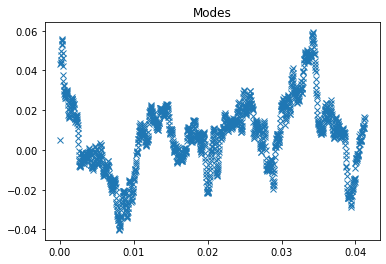

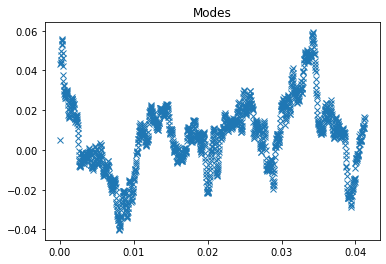

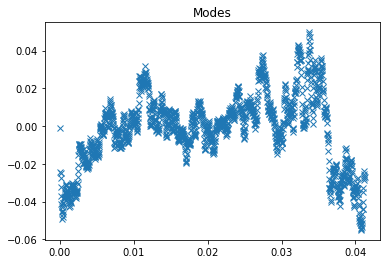

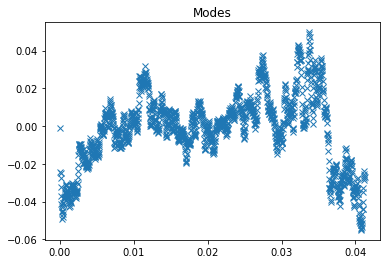

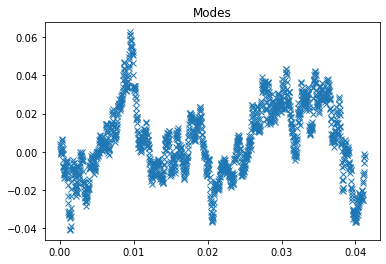

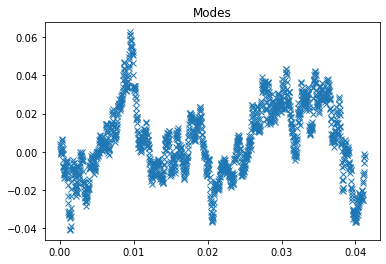

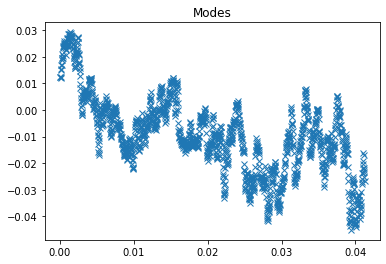

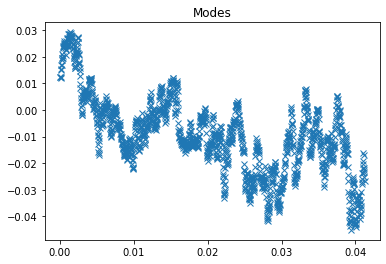

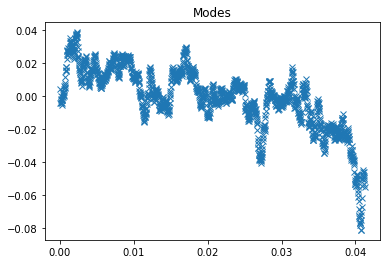

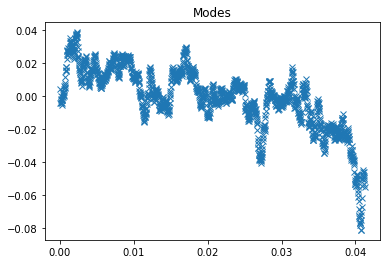

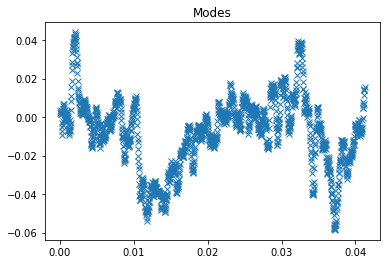

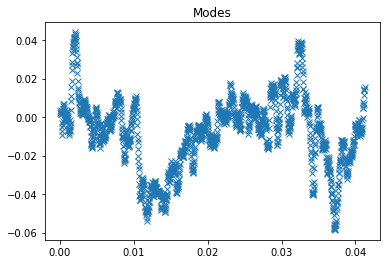

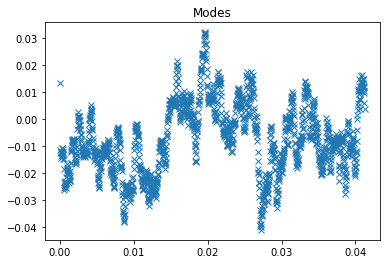

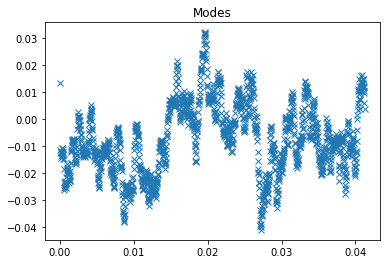

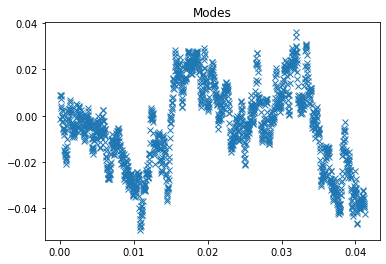

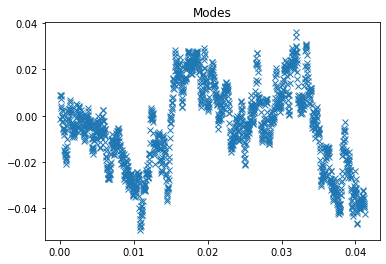

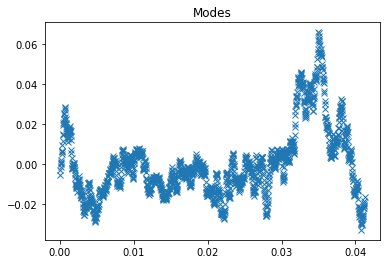

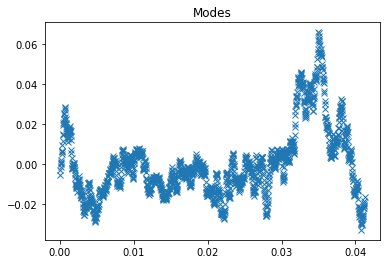

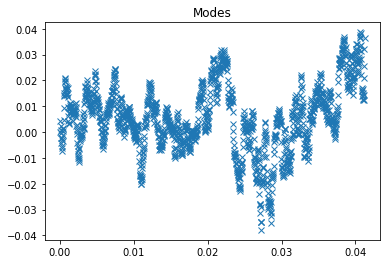

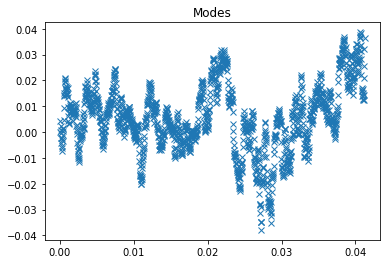

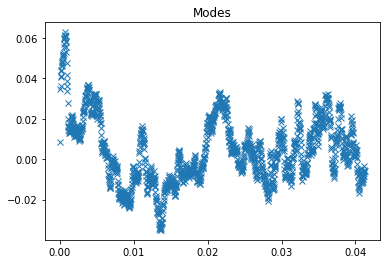

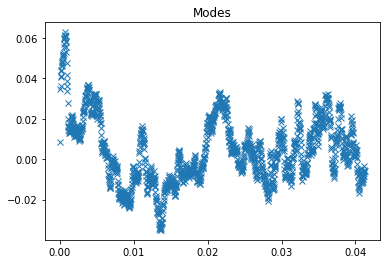

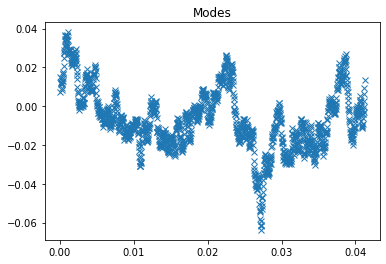

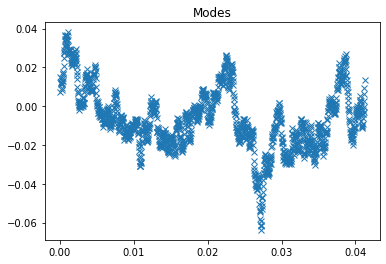

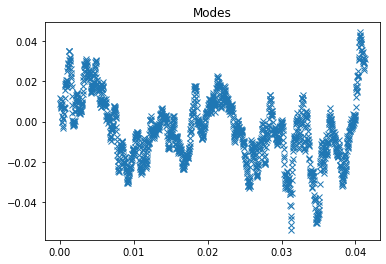

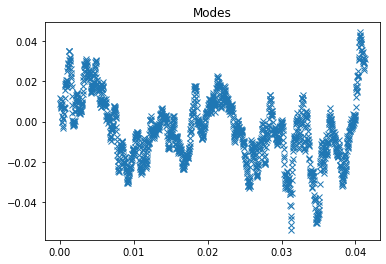

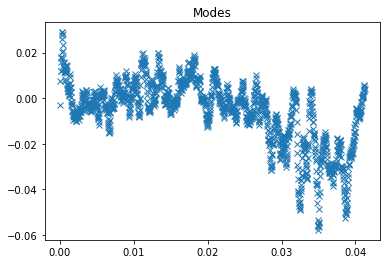

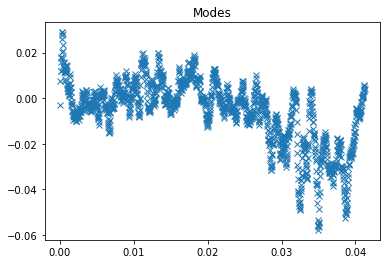

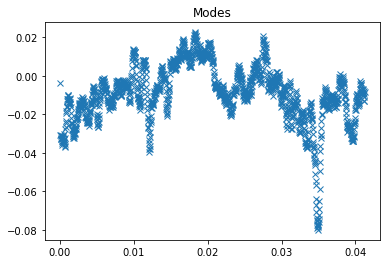

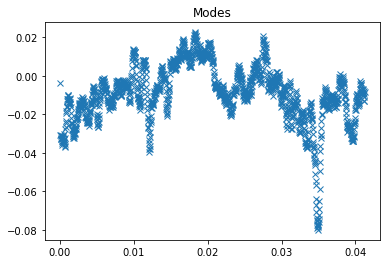

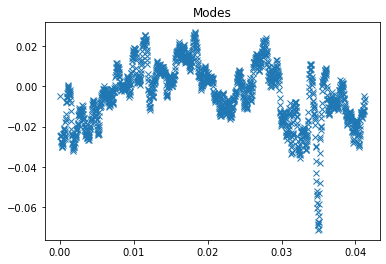

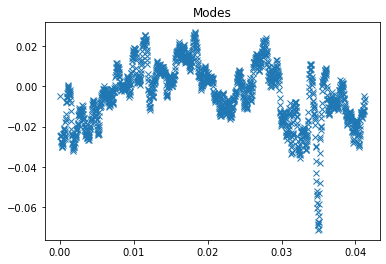

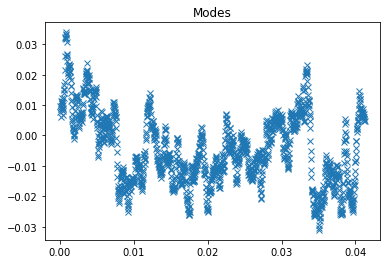

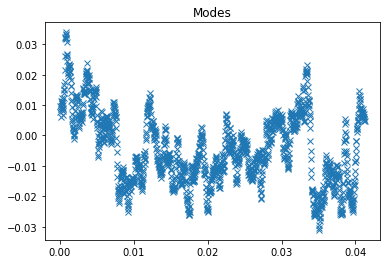

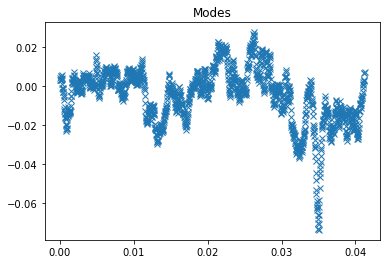

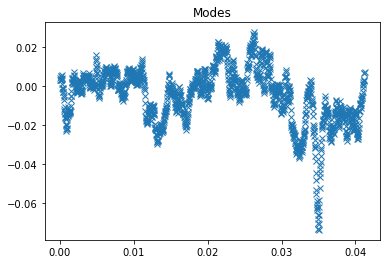

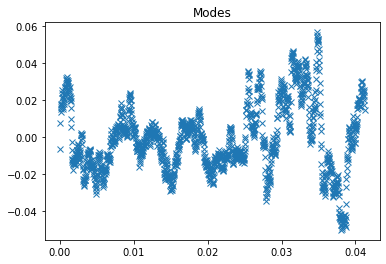

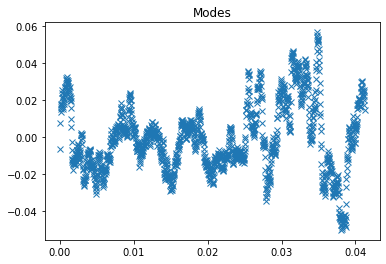

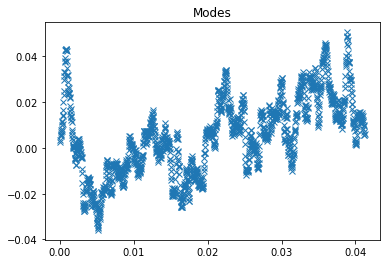

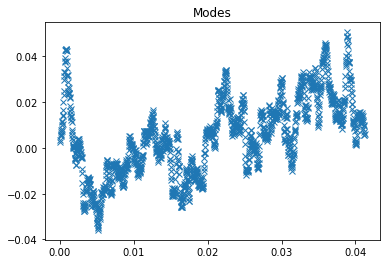

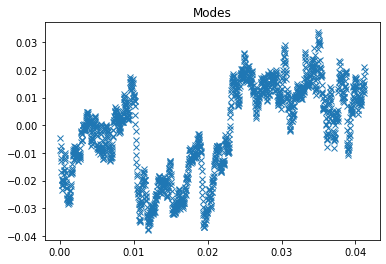

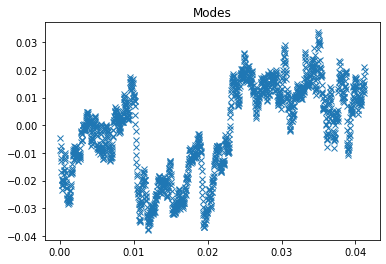

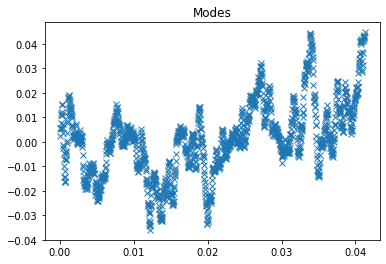

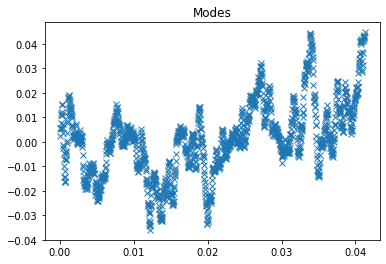

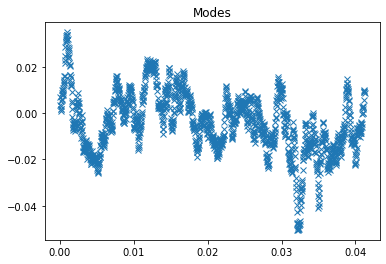

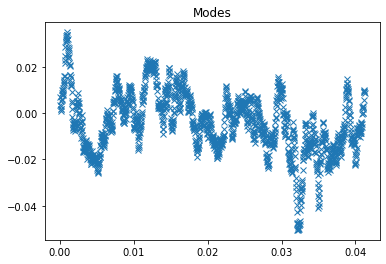

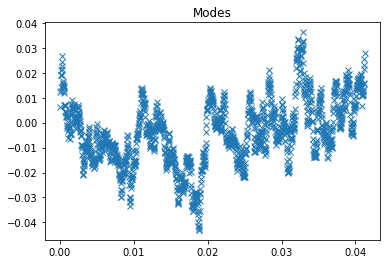

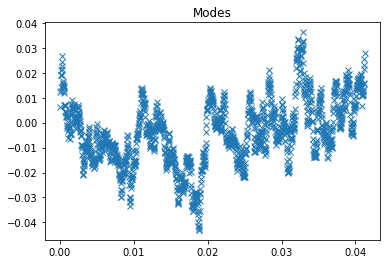

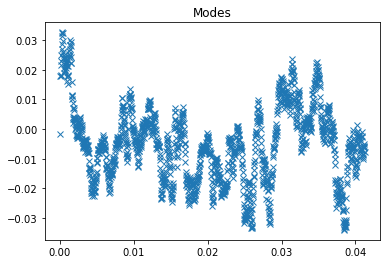

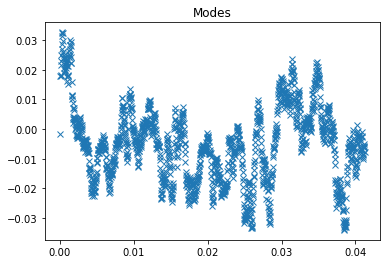

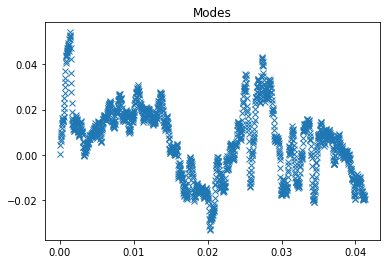

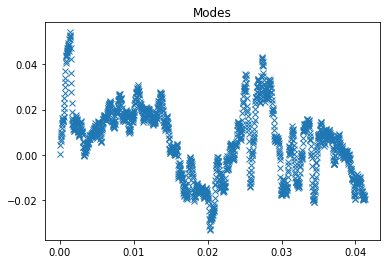

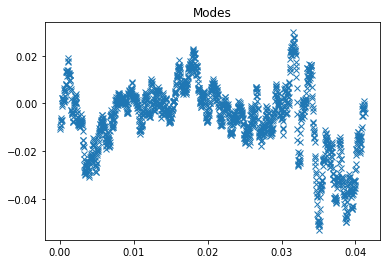

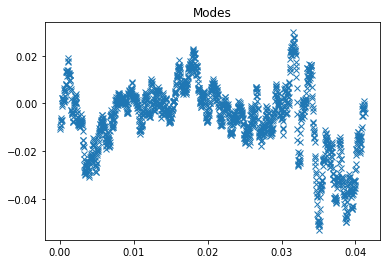

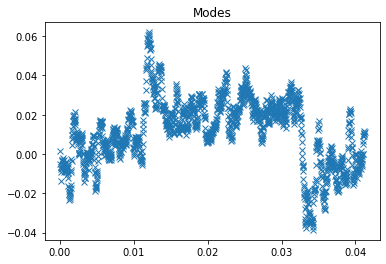

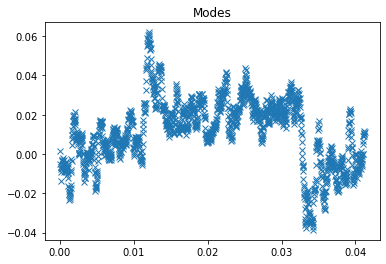

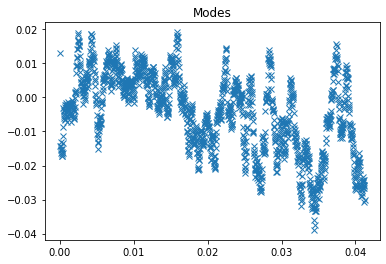

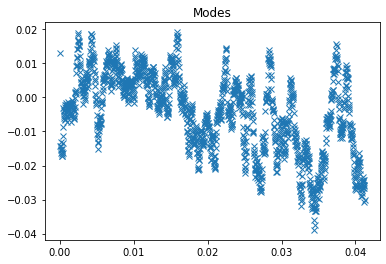

In [15]:
for mode in dmd.modes.T:
    plt.plot(xlist, mode.real,'x')
    plt.title('Modes')
    plt.show()

#for dynamic in dmd.dynamics:
#    plt.plot(tlist, dynamic.real, 'o')
#    plt.title('Dynamics')
#    plt.yscale("log")
#    plt.show()

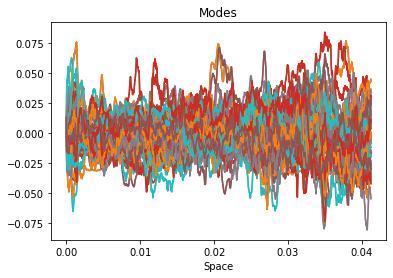

In [16]:
for mode in dmd.modes.T:
    plt.plot(xlist, mode.real)
    plt.title('Modes')
    plt.xlabel('Space')



In [17]:
count_list = []


In [18]:
 # calculating the number of eigenvalues for the different sampling intervals 

var     = open("Eigenvalues_1s.txt", 'r')
var2    = open("Eigenvalues_2s.txt", 'r')
var4    = open("Eigenvalues_4s.txt", 'r')
var8    = open("Eigenvalues_8s.txt", 'r')
var16   = open("Eigenvalues_16s.txt", 'r')
var32   = open("Eigenvalues_32s.txt", 'r')


items = {'1':var,'2':var2,'3':var4,'4':var8,'5':var16,'6':var32}
Choose_Item = input("Select your Item: ")
try:
    var_input = (items[Choose_Item])
    Lines = var_input.readlines()
    count = 0
    for line in Lines: 
        count += 1
    print(count)
    count_list.append(count)
    print(count_list)
    
    
except KeyError:
    print('Item %s not found' % Choose_Item)


    





#plt.plot(count, sampling_int[i], color='green', linestyle='dashed', linewidth = 3,
#         marker='o', markerfacecolor='blue', markersize=12)


Select your Item: 1
296
[296]


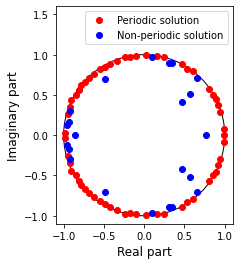

Number of periodic solutions 59
Number of non-periodic solutions 37
Sum of all magnitudes 90.9591142163453


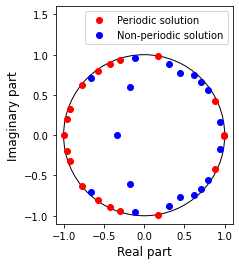

Number of periodic solutions 19
Number of non-periodic solutions 28
Sum of all magnitudes 43.508218305189565


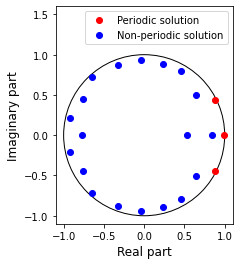

Number of periodic solutions 3
Number of non-periodic solutions 19
Sum of all magnitudes 17.97549081265368


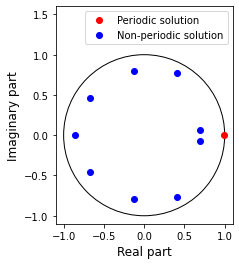

Number of periodic solutions 1
Number of non-periodic solutions 9
Sum of all magnitudes 6.844578100066843


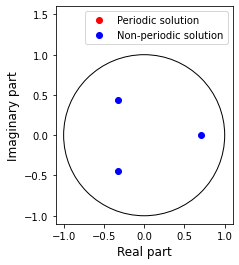

Number of periodic solutions 0
Number of non-periodic solutions 4
Sum of all magnitudes 2.116726748337843
[96, 47, 22, 10, 4]


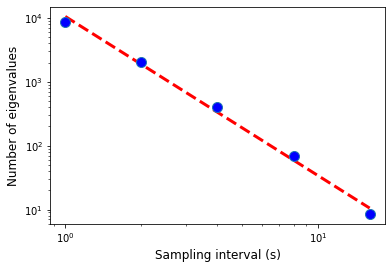

In [19]:
### q = 0.4ml/min 
with open('q04_Eigenvalues_1s.pkl','rb') as f:
    q04_data_1s = pickle.load(f)
    
with open('q04_Eigenvalues_2s.pkl','rb') as f:
    q04_data_2s = pickle.load(f)
    
with open('q04_Eigenvalues_4s.pkl','rb') as f:
    q04_data_4s = pickle.load(f)    
    
with open('q04_Eigenvalues_8s.pkl','rb') as f:
    q04_data_8s = pickle.load(f)
    
with open('q04_Eigenvalues_16s.pkl','rb') as f:
    q04_data_16s = pickle.load(f)  

    

def eigenval_stable(data):
    dist_uc = np.abs(data.imag**2+data.real**2)
    ang_x   = np.arctan(data.imag/ data.real) / (2*np.pi)

    figure, axes = plt.subplots()
    cc = plt.Circle(( 0 , 0 ), 1 , fill = False) 
    axes.set_aspect( 1 ) 
    axes.add_artist( cc )
    plt.plot(data.real[(0.95 < dist_uc) & (dist_uc < 1.01)],data.imag[(0.95 < dist_uc) & (dist_uc < 1.01)],'ro')
    plt.plot(data.real[dist_uc <= 0.95],data.imag[dist_uc <= 0.95],'bo')
    plt.ylabel('Imaginary part', fontsize = 12)
    plt.xlabel('Real part', fontsize = 12)
    plt.legend(['Periodic solution', 'Non-periodic solution'])
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.6)

    plt.show()
    periodic = dist_uc[(0.95 < dist_uc) & (dist_uc < 1.01)]
    print("Number of periodic solutions", len(periodic))
    print("Number of non-periodic solutions",  (len(dist_uc) - len(periodic)))
    q04_periodic_list.append(len(periodic))
    q04_non_periodic_list.append((len(dist_uc) - len(periodic)))
    print("Sum of all magnitudes", sum(dist_uc))
    q04_sum_mag.append(sum(dist_uc))
    
    q04_angle.append(ang_x)
    q04_mag.append(dist_uc)

q04_periodic_list     = []
q04_non_periodic_list = []
q04_sum_mag           = []
q04_mag               = []
q04_angle             = []

eigenval_stable(q04_data_1s)  
eigenval_stable(q04_data_2s)    
eigenval_stable(q04_data_4s)    
eigenval_stable(q04_data_8s)    
eigenval_stable(q04_data_16s)    



#number of modes for the different sampling intervals 
q04_count_list   = [len(q04_data_1s), len(q04_data_2s), len(q04_data_4s), len(q04_data_8s),len(q04_data_16s)]
sampling_int     = [1, 2, 4, 8, 16]

count_mag = np.array(q04_sum_mag)* np.array(q04_count_list)

print(q04_count_list)
logA = np.log(sampling_int)
logB = np.log(count_mag)


m, cov      = np.polyfit(logA, logB, 1, cov=True) # fit log(y) = m*log(x) + c
y_fit       = np.exp(m[0]*logA + m[1]) # calculate the fitted values of y 
d_slope_q04 = np.sqrt(cov[1][1]) #slope uncertainty 
m_q04 = m

#plt.plot(sampling_int, count_list, color = 'r')
plt.plot(sampling_int, y_fit, color='red', linestyle='dashed', linewidth = 3)
plt.plot(sampling_int, count_mag, 'o', markerfacecolor='blue', markersize=10)
plt.yscale("log")
plt.xscale("log")
plt.ylabel('Number of eigenvalues', fontsize = 12)
plt.xlabel('Sampling interval (s)', fontsize = 12)


ax.set_yscale('symlog')
ax.set_xscale('symlog')





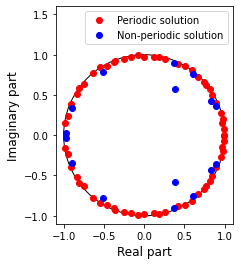

Number of periodic solutions 64
Number of non-periodic solutions 32
Sum of all magnitudes 92.82992771603995


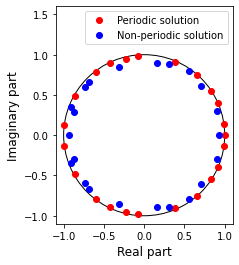

Number of periodic solutions 23
Number of non-periodic solutions 24
Sum of all magnitudes 44.04348602251739


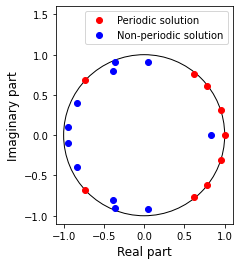

Number of periodic solutions 9
Number of non-periodic solutions 13
Sum of all magnitudes 20.46709975271874


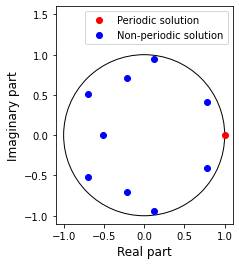

Number of periodic solutions 1
Number of non-periodic solutions 9
Sum of all magnitudes 7.240800367500468


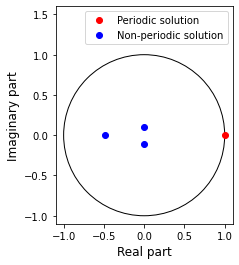

Number of periodic solutions 1
Number of non-periodic solutions 3
Sum of all magnitudes 1.258876241558691
[92.82992771603995, 44.04348602251739, 20.46709975271874, 7.240800367500468, 1.258876241558691]
[96, 47, 22, 10, 4]
[-2.64160566  9.40986986]


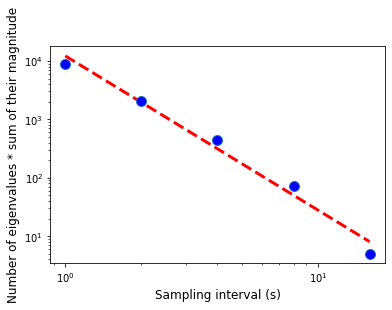

In [20]:
### q = 0.7ml/min 
with open('q07_Eigenvalues_1s.pkl','rb') as f:
    q07_data_1s = pickle.load(f)
    
with open('q07_Eigenvalues_2s.pkl','rb') as f:
    q07_data_2s = pickle.load(f)
    
with open('q07_Eigenvalues_4s.pkl','rb') as f:
    q07_data_4s = pickle.load(f)    
    
with open('q07_Eigenvalues_8s.pkl','rb') as f:
    q07_data_8s = pickle.load(f)
    
with open('q07_Eigenvalues_16s.pkl','rb') as f:
    q07_data_16s = pickle.load(f)  

    

def eigenval_stable(data):
    dist_uc = np.abs(data.imag**2+data.real**2)
    ang_x   = np.arctan(data.imag/ data.real) / (2*np.pi)

    
    figure, axes = plt.subplots()
    cc = plt.Circle(( 0 , 0 ), 1 , fill = False) 
    axes.set_aspect( 1 ) 
    axes.add_artist( cc )
    plt.plot(data.real[(0.95 < dist_uc) & (dist_uc < 1.01)],data.imag[(0.95 < dist_uc) & (dist_uc < 1.01)],'ro')
    plt.plot(data.real[dist_uc <= 0.95],data.imag[dist_uc <= 0.95],'bo')
    plt.ylabel('Imaginary part', fontsize = 12)
    plt.xlabel('Real part', fontsize = 12)
    plt.legend(['Periodic solution', 'Non-periodic solution'])
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.6)

    plt.show()
    periodic = dist_uc[(0.95 < dist_uc) & (dist_uc < 1.01)]
    print("Number of periodic solutions", len(periodic))
    print("Number of non-periodic solutions",  (len(dist_uc) - len(periodic)))
    q07_periodic_list.append(len(periodic))
    q07_non_periodic_list.append((len(dist_uc) - len(periodic)))
    print("Sum of all magnitudes", sum(dist_uc))
    q07_sum_mag.append(sum(dist_uc))
    q07_angle.append(ang_x)
    q07_mag.append(dist_uc)

q07_periodic_list     = []
q07_non_periodic_list = []
q07_sum_mag           = []
q07_mag               = []
q07_angle             = []

eigenval_stable(q07_data_1s)  
eigenval_stable(q07_data_2s)    
eigenval_stable(q07_data_4s)    
eigenval_stable(q07_data_8s)    
eigenval_stable(q07_data_16s)    



#number of modes for the different sampling intervals 
q07_count_list   = [len(q07_data_1s), len(q07_data_2s), len(q07_data_4s), len(q07_data_8s),len(q07_data_16s)]
sampling_int     = [1, 2, 4, 8, 16]

print(q07_sum_mag)
print(q07_count_list)
count_mag = np.array(q07_sum_mag)* np.array(q07_count_list)

logA = np.log(sampling_int)
logB = np.log(count_mag)

#logB = np.log(count_list) 

m, cov      = np.polyfit(logA, logB, 1, cov=True) # fit log(y) = m*log(x) + c
y_fit       = np.exp(m[0]*logA + m[1]) # calculate the fitted values of y 
d_slope_q07 = np.sqrt(cov[1][1]) #slope uncertainty 
print(m)
m_q07 = m

#plt.plot(sampling_int, count_list, color = 'r')
plt.plot(sampling_int, y_fit, color='red', linestyle='dashed', linewidth = 3)
plt.plot(sampling_int, count_mag, 'o', markerfacecolor='blue', markersize=10)
plt.yscale("log")
plt.xscale("log")
plt.ylabel('Number of eigenvalues * sum of their magnitude', fontsize = 12)
plt.xlabel('Sampling interval (s)', fontsize = 12)


ax.set_yscale('symlog')
ax.set_xscale('symlog')

plt.show()

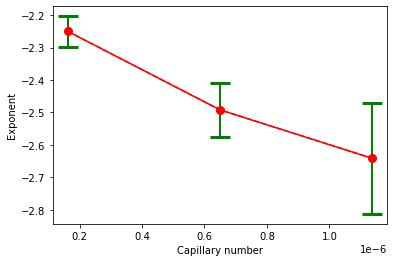

In [21]:
## capillary number for the experiments 

exponent   = [m_q01[0], m_q04[0], m_q07[0]]
cov_exp    = [d_slope_q01, d_slope_q04, d_slope_q07]
cov_exp[:] = [ x / 2 for x in cov_exp]

# values lifted from Cat Reynold's and Ying's papers
sig_n2  = 64    *10**-3    # interfacial tension (N/m) brine/nitrogen
mu_w    = 8.9  * 10**(-4)  # viscosity water
mu_n2   = 20.8 * 10**(-6)  # viscosity nitrogen

# samples are ~5mm in diameter
q     = 1 *60**(-1)*10**-6        #flow rate in m^3/s
A     = np.pi*(2.5*10**-3)**2        #area of injection (diameter 5mm)
L     = 20*10**-3                #length of core 


# Nitrogen/brine fluid pair Ca
fw    = 0.85
qt    = [0.1, 0.4, 0.7]

Ca_n2 = [0] * (len(qt))   #columns are the same qt, rows are the same fw 
abs_perm = 1.2443*10**-13

cnt = 0
for j in range(0,len(qt)):
    v_w2           = q*qt[j]*fw/A 
    v_nw2          = q*qt[j]*(1-fw)/A 
    Ca_n2[cnt]     = (v_w2/fw/(sig_n2* (fw/mu_w +(1-fw)/mu_n2)))
    cnt            = cnt+1;

plt.plot(Ca_n2,exponent,'-ro',markerfacecolor='blue')
plt.errorbar(Ca_n2, exponent, yerr = cov_exp, fmt = '--ro', ms=8, ecolor='g', elinewidth = 2, capsize = 10, capthick = 3)
plt.xlabel('Capillary number')
plt.ylabel('Exponent')
plt.show()



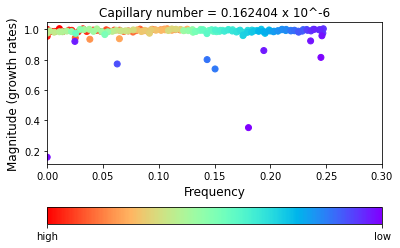

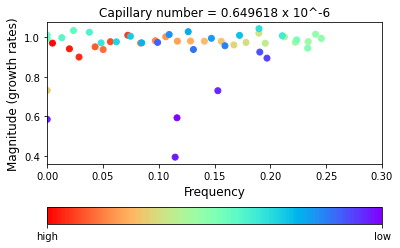

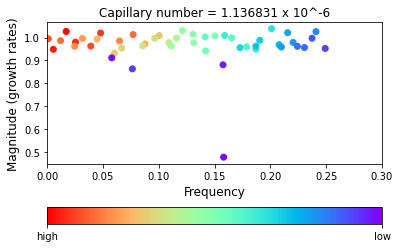

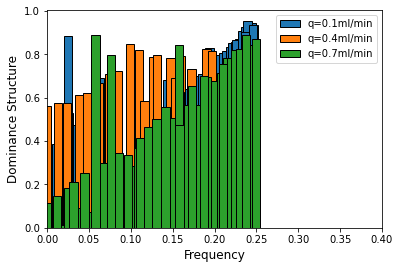

In [28]:
#plot of the angle versus the magnitude of the eigenvectors for differnt Ca numbers


list_angle = [angle[0], q04_angle[0], q07_angle[0]] #looking at one sampling time over all capillary numbers 
list_mag   = [mag[0], q04_mag[0], q07_mag[0]]

for i in range(len(list_angle)): #iterating over different sampling intervals 
    color_indices = np.linspace(0,1, len(list_angle[i]))
    plt.scatter(list_angle[i], list_mag[i], c=color_indices, cmap=cm.get_cmap('rainbow_r'))
    
    plt.ylabel('Magnitude (growth rates)', fontsize = 12)
    plt.xlabel('Frequency', fontsize = 12,)
    cbar    = plt.colorbar(orientation="horizontal", pad =0.2)
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(['high','low'])
    cap_num = Ca_n2[i]*10**6 
    plt.title('Capillary number = %f x 10^-6' % cap_num)
    plt.xlim([0, 0.3])
    plt.show()

#plot of the dominance structure 
for i in range(len(list_angle)):
    color_indices = np.linspace(0,1, len(list_angle[i]))
    plt.bar(list_angle[i], list_mag[i] * color_indices, width = 0.01, edgecolor = "black")
    
    plt.xlim([0, 0.4])
    plt.ylabel('Dominance Structure', fontsize = 12)
    plt.xlabel('Frequency', fontsize = 12)
plt.legend(['q=0.1ml/min','q=0.4ml/min','q=0.7ml/min'])
plt.show()



In [23]:
cols = [i for i in range(1, 300, 2)]
df = pd.read_excel(swproffilename, usecols=cols, skiprows=[0,1])
print(df)

            cm         1         3         5         7         9        11  \
0     0.000028  0.078157  0.079830  0.077857  0.079233  0.077151  0.077421   
1     0.000055  0.259557  0.268139  0.263587  0.262957  0.260840  0.267665   
2     0.000082  0.263022  0.271821  0.266884  0.266394  0.263772  0.272116   
3     0.000110  0.265653  0.271975  0.268654  0.267887  0.265075  0.274442   
4     0.000138  0.269664  0.275893  0.271729  0.271867  0.268947  0.279098   
...        ...       ...       ...       ...       ...       ...       ...   
1494  0.041113  0.345772  0.351334  0.341679  0.352949  0.352507  0.341821   
1495  0.041140  0.346705  0.351242  0.341957  0.352669  0.352830  0.342347   
1496  0.041168  0.345164  0.349740  0.339749  0.350315  0.352541  0.340819   
1497  0.041195  0.347659  0.351547  0.341998  0.352875  0.355303  0.342965   
1498  0.041223  0.346056  0.351250  0.341427  0.351865  0.353975  0.342070   

            13        15        17  ...        81        83    

In [ ]:
# source code for converting to 3D. This just integrates the data to get X Y matrices, so might 
# just have to average in both directions for Tom's data set. 

# convenience method for integrating
def integrate(rhs, tspan, y0):

    # empty array to hold solution
    y0 = np.asarray(y0) # force to numpy array
    Y = np.empty((len(y0), tspan.size), dtype=y0.dtype)
    Y[:, 0] = y0

    # auto-detect complex systems
    _ode = complex_ode if np.iscomplexobj(y0) else ode

    # create explicit Runge-Kutta integrator of order (4)5
    r = _ode(rhs).set_integrator('dopri5')
    r.set_initial_value(Y[:, 0], tspan[0])

    # run the integration
    for i, t in enumerate(tspan):
        if not r.successful():
            break
        if i == 0:
            continue # skip the initial position
        r.integrate(t)
        Y[:, i] = r.y

    # return solution
    return Y

# the right-hand side of our ODE
def saddle_focus(t, y, rho = 1, omega = 1, gamma = 1):

    return dot(np.array([
                [-rho, -omega, 0],
                [omega, -rho, 0],
                [0, 0, gamma]
            ]), y)

# generate data
dt = 0.01
tspan = np.arange(0, 50, dt)
X = np.zeros([3, 0])
Y = np.zeros([3, 0])
z_cutoff = 15 # to truncate the trajectory if it gets too large in z
for i in range(20):
    theta0 = 2*pi*np.random.rand()
    x0 = 3*cos(theta0)
    y0 = 3*sin(theta0)
    z0 = np.random.randn()
    D = integrate(saddle_focus, tspan, [x0, y0, z0])
    D = D[:,np.abs(D[2,:]) < z_cutoff]
    X = np.concatenate([X, D[:,:-1]], axis=1)
    Y = np.concatenate([Y, D[:,1:]], axis=1)

check_linear_consistency(X, Y); # raise a warning if not linearly consistent